In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
kc_house_data = pd.read_csv('gdrive/My Drive/uwml/kc_house_data.csv')
wk3_kc_house_set_1_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_1_data.csv')
wk3_kc_house_set_2_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_2_data.csv')
wk3_kc_house_set_3_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_3_data.csv')
wk3_kc_house_set_4_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_set_4_data.csv')
wk3_kc_house_test_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_test_data.csv')
wk3_kc_house_train_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_train_data.csv')
wk3_kc_house_valid_data = pd.read_csv('gdrive/My Drive/uwml/wk3_kc_house_valid_data.csv')

In [4]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
def polynomial_dataframe(feature, degree): 
  poly_dataframe = pd.DataFrame()
  poly_dataframe['power_1'] = feature
  # first check if degree > 1
  if degree > 1:
    # then loop over the remaining degrees:
    for power in range(2, degree+1):
      # first we'll give the column a name:
      name = 'power_' + str(power)
      poly_dataframe[name] = feature.apply(lambda x: x**power)
  return poly_dataframe

In [6]:
# Test
polynomial_dataframe(wk3_kc_house_set_1_data['bedrooms'], 3)

,power_1,power_2,power_3
0,1,1,1
1,1,1,1
2,1,1,1
3,3,9,27
4,1,1,1
...,...,...,...
5399,5,25,125
5400,5,25,125
5401,5,25,125
5402,6,36,216


In [7]:
sales = kc_house_data.sort_values(['sqft_living','price'])

poly1_data = polynomial_dataframe(sales['sqft_living'], 15)

poly1_data['price'] = sales['price']

#poly1_data
poly1_data.iloc[:,1:5]
#poly1_data.iloc[:,1:5].values

,power_2,power_3,power_4,power_5
19452,84100,24389000,7072810000,2051114900000
15381,136900,50653000,18741610000,6934395700000
860,144400,54872000,20851360000,7923516800000
18379,147456,56623104,21743271936,8349416423424
4868,152100,59319000,23134410000,9022419900000
...,...,...,...,...
8092,92929600,895841344000,8635910556160000,83250177761382400000
9254,97812100,967361669000,9567206906410000,94619676304394900000
3914,100801600,1012048064000,10160962562560000,102016064128102400000
7252,145202500,1749690125000,21083766006250000,254059380375312500000


In [8]:
# Model 1
model_a = sm.OLS(
    endog = poly1_data['price'], 
    exog = sm.add_constant(poly1_data['power_1'])
    ).fit()

print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:14:48   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.0

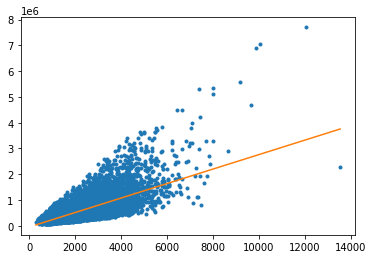

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(
  poly1_data['power_1'],poly1_data['price'],'.',
  poly1_data['power_1'], model_a.predict(sm.add_constant(poly1_data['power_1'])),'-'
  )

In [10]:
# Model 2
model_b = sm.OLS(
    endog = poly1_data['price'], 
    #exog = sm.add_constant(poly1_data['power_2']).astype(float)
    exog = sm.add_constant(poly1_data.iloc[:,0:2]).astype(float)
    ).fit()

print(model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 1.232e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:14:48   Log-Likelihood:            -2.9938e+05
No. Observations:               21613   AIC:                         5.988e+05
Df Residuals:                   21610   BIC:                         5.988e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.992e+05   7058.005     28.226      0.0

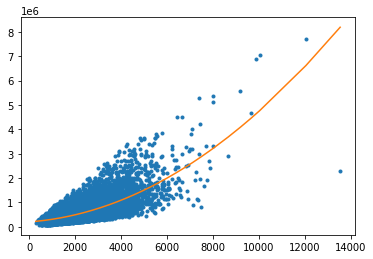

In [11]:
plt.plot(
  poly1_data['power_1'],poly1_data['price'],'.',
  poly1_data['power_1'], model_b.predict(sm.add_constant(poly1_data.iloc[:,0:2]).astype(float)),'-'
  )

In [12]:
# Model 3
model_c = sm.OLS(
    endog = poly1_data['price'], 
    exog = sm.add_constant(poly1_data.iloc[:,0:3]).astype(float)
    ).fit()

print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     8422.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:14:48   Log-Likelihood:            -2.9924e+05
No. Observations:               21613   AIC:                         5.985e+05
Df Residuals:                   21609   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.368e+05   1.07e+04     31.594      0.0

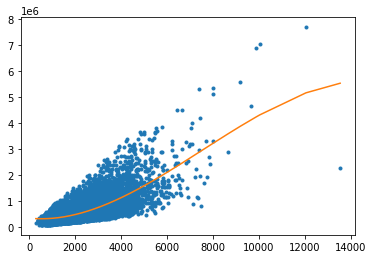

In [13]:
plt.plot(
  poly1_data['power_1'],poly1_data['price'],'.',
  poly1_data['power_1'], model_c.predict(sm.add_constant(poly1_data.iloc[:,0:3]).astype(float)),'-'
  )

In [14]:
# Model 4
model_c = sm.OLS(
    endog = poly1_data['price'], 
    exog = sm.add_constant(poly1_data.iloc[:,0:4]).astype(float)
    ).fit()

print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     8405.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:14:49   Log-Likelihood:            -2.9925e+05
No. Observations:               21613   AIC:                         5.985e+05
Df Residuals:                   21609   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4602      0.006     70.849      0.0

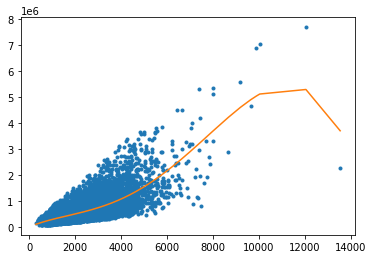

In [15]:
plt.plot(
  poly1_data['power_1'],poly1_data['price'],'.',
  poly1_data['power_1'], model_c.predict(sm.add_constant(poly1_data.iloc[:,0:4]).astype(float)),'-'
  )

In [16]:
poly1_data = polynomial_dataframe(wk3_kc_house_set_1_data['sqft_living'], 15)
poly1_data['price'] = wk3_kc_house_set_1_data['price']

poly2_data = polynomial_dataframe(wk3_kc_house_set_2_data['sqft_living'], 15)
poly2_data['price'] = wk3_kc_house_set_2_data['price']

poly3_data = polynomial_dataframe(wk3_kc_house_set_3_data['sqft_living'], 15)
poly3_data['price'] = wk3_kc_house_set_3_data['price']

poly4_data = polynomial_dataframe(wk3_kc_house_set_4_data['sqft_living'], 15)
poly4_data['price'] = wk3_kc_house_set_4_data['price']

poly4_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000,142000.0
1,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000,276000.0
2,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000,245000.0
3,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024,265000.0
4,470,220900,103823000,48796810000,22934500700000,10779215329000000,5066231204630000000,2381128666176100000000,1119130473102767000000000,525991322358300490000000000,247215921508401230300000000000,116191483108948578241000000000000,54609997061205831773270000000000000,25666698618766740933436900000000000000,12063348350820368238715343000000000000000,156000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,6880,47334400,325660672000,2240545423360000,15414952512716800000,106054873287491584000000,729657528217942097920000000,5020043794139441633689600000000,34537901303679358439784448000000000,237620760969313986065717002240000000000,1634830835468880224132132975411200000000000,11247636148025895942029074870829056000000000000,7738373669841816408116003511130390528000000000...,5324001084851169688783810415657708683264000000...,3662912746377604745883261565972503574085632000...,1488000.0
5398,7080,50126400,354894912000,2512655976960000,17789604316876800000,125950398563487744000000,891728821829493227520000000,6313440058552812050841600000000,44699155614553909319958528000000000,316470021751041677985306378240000000000,2240607753997375080135969157939200000000000,15863502898301415567362661638209536000000000000,1123136005199740222169276443985235148800000000...,7951802916814160772958477223415464853504000000...,5629876465104425827254601874178149116280832000...,4000000.0
5399,7350,54022500,397065375000,2918430506250000,21450464220937500000,157660912023890625000000,1158807703375596093750000000,8517236619810631289062500000000,62601689155608139974609375000000000,460122415293719828813378906250000000000,3381899752408840741778334960937500000000000,24856963180204979452070761962890625000000000000,1826986793745065989727201004272460937500000000...,1342835293402623502449492738140258789062500000...,9869839406509282743003771625330902099609375000...,1110000.0
5400,7390,54612100,403583419000,2982481466410000,22040538036769900000,162879576091729561000000,1203680067317881455790000000,8895195697479143958288100000000,65735496204370873851749059000000000,485785316950300757764425546010000000000,3589953492262722599879104785013900000000000,26529756307821520013106584361252721000000000000,1960548991148010328968576584296576081900000000...,1448845704458379633107778095795169724524100000...,1070696975594742548866648012792630426423309900...,5300000.0


In [17]:
model1 = sm.OLS(
    endog = poly1_data['price'], 
    exog = sm.add_constant(poly1_data.iloc[:,0:15]).astype(float)
    ).fit()

model2 = sm.OLS(
    endog = poly2_data['price'], 
    exog = sm.add_constant(poly2_data.iloc[:,0:15]).astype(float)
    ).fit()

model3 = sm.OLS(
  endog = poly3_data['price'], 
  exog = sm.add_constant(poly3_data.iloc[:,0:15]).astype(float)
  ).fit()

model4 = sm.OLS(
  endog = poly4_data['price'], 
  exog = sm.add_constant(poly4_data.iloc[:,0:15]).astype(float)
  ).fit()

print(model1.params)
print(model2.params)
print(model3.params)
print(model4.params)

const       6.998479e-94
power_1    -7.307855e-49
power_2     1.278646e-55
power_3     4.958728e-60
power_4     1.643710e-77
power_5     1.784686e-74
power_6     1.366532e-70
power_7     1.035548e-66
power_8     7.699040e-63
power_9     5.543921e-59
power_10    3.787194e-55
power_11    2.365357e-51
power_12    1.249831e-47
power_13    4.466425e-44
power_14   -6.956928e-48
power_15    2.702043e-52
dtype: float64
const       3.517945e-90
power_1    -3.202774e-48
power_2    -4.720880e-54
power_3     5.309968e-58
power_4     1.777725e-74
power_5     1.611527e-71
power_6     8.767063e-68
power_7     4.710594e-64
power_8     2.476073e-60
power_9     1.256132e-56
power_10    6.021428e-53
power_11    2.627828e-49
power_12    9.660086e-46
power_13    2.391397e-42
power_14   -5.717156e-46
power_15    3.390889e-50
dtype: float64
const       9.177576e-92
power_1    -4.937287e-49
power_2     1.718442e-54
power_3     4.194168e-88
power_4     9.719542e-76
power_5     9.068303e-73
power_6     5.735295

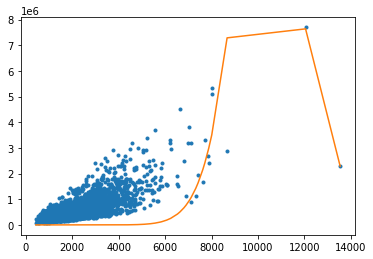

In [18]:
plt.plot(
  poly1_data['power_1'],poly1_data['price'],'.',
  poly1_data['power_1'], model1.predict(sm.add_constant(poly1_data.iloc[:,0:15]).astype(float)),'-'
  )

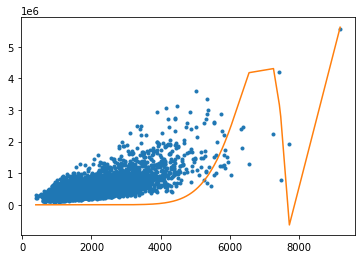

In [19]:
plt.plot(
  poly2_data['power_1'],poly2_data['price'],'.',
  poly2_data['power_1'], model2.predict(sm.add_constant(poly2_data.iloc[:,0:15]).astype(float)),'-'
  )

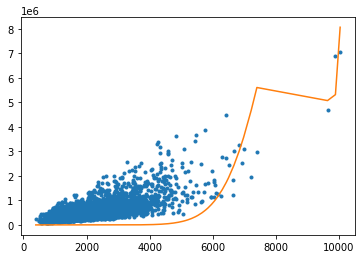

In [20]:
plt.plot(
  poly3_data['power_1'],poly3_data['price'],'.',
  poly3_data['power_1'], model3.predict(sm.add_constant(poly3_data.iloc[:,0:15]).astype(float)),'-'
  )

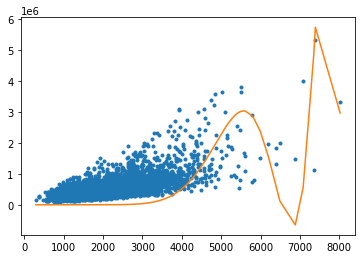

In [21]:
plt.plot(
  poly4_data['power_1'],poly4_data['price'],'.',
  poly4_data['power_1'], model4.predict(sm.add_constant(poly4_data.iloc[:,0:15]).astype(float)),'-'
  )

In [22]:
poly_train_data = polynomial_dataframe(wk3_kc_house_train_data['sqft_living'], 15)
poly_train_data['price'] = wk3_kc_house_train_data['price']

poly_valid_data = polynomial_dataframe(wk3_kc_house_valid_data['sqft_living'], 15)
poly_valid_data['price'] = wk3_kc_house_valid_data['price']

In [28]:
for poly in range(1,16):
  x_col = poly# + 1
  #x_col = 'power_' + str(poly)
  model_num = 'model_' + str(poly)
  model = sm.OLS(
    endog = poly_train_data['price'], 
    exog = sm.add_constant(poly_train_data.iloc[:,0:x_col]).astype(float)
    #exog = sm.add_constant(poly_train_data[x_col]).astype(float)
    ).fit()
  valid_yhat = model.predict(sm.add_constant(poly_valid_data.iloc[:,0:x_col]))
  #valid_yhat = model.predict(sm.add_constant(poly_valid_data[x_col]))
  valid_y = poly_valid_data['price'].values
  valid_e = valid_yhat - valid_y
  valid_ssr = np.sum(valid_e**2)
  print(model_num, ': Training SSR -', round(model.ssr/1e12,2), ': Validation SSR -', round(valid_ssr/1e12,2))

model_1 : Training SSR - 707.0 : Validation SSR - 629.1
model_2 : Training SSR - 617.68 : Validation SSR - 623.96
model_3 : Training SSR - 617.67 : Validation SSR - 625.82
model_4 : Training SSR - 624.36 : Validation SSR - 607.71
model_5 : Training SSR - 675.71 : Validation SSR - 635.09
model_6 : Training SSR - 845.05 : Validation SSR - 1777.69
model_7 : Training SSR - 1184.5 : Validation SSR - 10074.32
model_8 : Training SSR - 1648.49 : Validation SSR - 48508.73
model_9 : Training SSR - 2141.72 : Validation SSR - 218348.92
model_10 : Training SSR - 2588.59 : Validation SSR - 945855.09
model_11 : Training SSR - 3723.17 : Validation SSR - 210642.91
model_12 : Training SSR - 3823.23 : Validation SSR - 524189.11
model_13 : Training SSR - 3889.19 : Validation SSR - 1420315.6
model_14 : Training SSR - 3934.87 : Validation SSR - 4026495.51
model_15 : Training SSR - 3967.92 : Validation SSR - 11652998.58


In [29]:
model_poly_4 = sm.OLS(
  endog = poly_train_data['price'], 
  exog = sm.add_constant(poly_train_data.iloc[:,0:4]).astype(float)
  ).fit()

print(model_poly_4.summary())
print(round(model_poly_4.ssr/1e12,2))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4071.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:18:08   Log-Likelihood:            -1.3528e+05
No. Observations:                9761   AIC:                         2.706e+05
Df Residuals:                    9757   BIC:                         2.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4543      0.011     41.885      0.0

In [25]:
poly_test_data = polynomial_dataframe(wk3_kc_house_test_data['sqft_living'], 15)
poly_test_data['price'] = wk3_kc_house_test_data['price']

In [30]:
test_yhat = model_poly_4.predict(sm.add_constant(poly_test_data.iloc[:,0:4]))
test_y = poly_test_data['price'].values
test_e = test_yhat - test_y
test_ssr = np.sum(test_e**2)

print(round(test_ssr/1e12,2))

138.94


In [31]:
test_ssr

138941417288079.81